In [1]:
# iterable -> 값을 하나씩 제공해주는 객체. => for in 문에서 사용할  수있는 객체.
# iterable(값들을 저장 + iterator를 생성) + iterator(iterable의 값을 제공) = for in
l = [1, 2, 3, 4]
for i in l:
    print(i)

1
2
3
4


In [2]:
# iterable 에서 iterator 생성
iterator = iter(l)
print(type(iterator))

<class 'list_iterator'>


In [7]:
next(iterator)

StopIteration: 

In [8]:
### for i in l
iterator = iter(l)
while True:
    try:
        i = next(iterator)
        print(i)
    except:
        break

1
2
3
4


In [ ]:
# iterable 타입을 구현 
## class로 구현
## __iter__(self) 메소드 구현 => iterator를 반환.

# iterator 타입을 구현
## class 로 구현
## __next__(self) 메소드를 구현 -> iterable의 원소들을 하나씩 순서대로 반환. 
##                                 제공할 값이 없으면 StopIteration Exception을 발생.

In [10]:
# substriptable 타입 - indexing으로 값을 조회가능한 객체. => index 연산자 사용 가능.
## 클래스로 구현
### __getitem__(self, index): index의 값을 반환하도록 구현. => s[index]
### __len__(self): 원소의 개수를 반환. => len()
l[0]

1

In [11]:
s = {1, 2, 3}
for a in s:
    print(a)

1
2
3


In [12]:
s[0]

TypeError: 'set' object is not subscriptable

# Dataset 과 DataLoader

-   딥러닝 모델을 학습시키고 평가할때 제공할 데이터셋을 관리하기 위한 클래스.
    -   `Dataset`은 데이터셋을 관리하고 `DataLoader`는 Model에 데이터를 제공하는 것을 관리한다.
-   **torch.utils.data.Dataset**
    -   원본 데이터셋(input/output dataset)의 위치를 가지고 있으면서 indexing으로 데이터를 **하나씩 제공**한다.
        -   제공시 data augmentation등 원본데이터를 변환해서 제공 할 수 있다.
    -   subscriptable, iterable 타입.
        > **subscriptable타입**: indexing을 이용해 원소 조회가 가능한 타입  
        > Dataset은 **slicing과 fancy indexing은 지원하지 않는다.** 즉 한번에 여러개 데이터조회를 지원하지 않는다.
-   **torch.utils.data.DataLoader**
    -   Dataset이 제공하는 데이터를 batch size 단위 묶어서 모델에 제공하기 위한 객체.
        -   iterable 타입
    -   Dataset이 가지고 있는 **데이터를 모델에 어떻게 제공**할 지 batch size, shuffle 여부 등을 설정한다.
-   **Dataset과 DataLoader 관계**
    -   **Dataset은** raw data를 하나씩 읽어서 제공하는 기능만 제공한다.
        -   **데이터를 읽어오는 것이 목적**
    -   **DataLoader는** Dataset에 데이터를 모델에 주입할 batch 크기 만큼 가져오는 역할을 한다.
        -   **데이터를 model에 제공하는 것이 목적**


# Built-in Dataset

-   파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
-   모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    -   [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    -   [audio dataset](https://pytorch.org/audio/stable/datasets.html)
    -   [text dataset](https://pytorch.org/text/stable/datasets.html)


## Image Built-in dataset Loading

torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

-   각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    -   **root**: str
        -   Raw data를 저장할 디렉토리 경로
    -   **train**: bool
        -   True일경우 Train set을 False일 경우 Test set을 load
    -   **download**: bool
        -   True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    -   **transform**: function
        -   Loading한 이미지를 변환하는 function.
            -   Normalization이나 data Agumentation 처리를 한다.


In [13]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [15]:
mnist_data_dir = "datasets"
mnist_trainset = datasets.MNIST(
    root=mnist_data_dir, # raw data의 위치.
    download=True,       # root에 없을 경우 다운받을지 여부
    train=True,          # True: train set, False: test set
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting datasets\MNIST\raw\train-images-idx3-ubyte.gz to datasets\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting datasets\MNIST\raw\train-labels-idx1-ubyte.gz to datasets\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%


Extracting datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to datasets\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100.0%

Extracting datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to datasets\MNIST\raw



In [16]:
print(type(mnist_trainset))

<class 'torchvision.datasets.mnist.MNIST'>


In [17]:
isinstance(mnist_trainset, Dataset)

True

In [18]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train

In [19]:
# Dataset의 총 데이터개수를 조회 - len()
len(mnist_trainset)

60000

In [20]:
# 개별 데이터를 조회 -> indexing
mnist_trainset[0]  # tuple( X,  y)

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [21]:
d = mnist_trainset[0]
d[0]

In [22]:
d[1]

5

In [23]:
mnist_trainset2 = datasets.MNIST(
    root=mnist_data_dir, 
    download=True,       
    train=True,
    transform=transforms.ToTensor()  # 전처리 함수/객체(__call__())를 설정.
)

In [25]:
d2 = mnist_trainset2[0]
d2[1]

5

In [29]:
# ToTensor()의 전처리 작업.
print(d2[0].type())  # PIL.Image, np.ndarray -> pytorch Tensor 로 변환
print(d2[0].min(), d2[0].max()) # 0 ~ 1 사이로 scaling. (MinMaxScaling)
print(d2[0].shape) # channel first 로 shape을 변경. (channel, height, width)

torch.FloatTensor
tensor(0.) tensor(1.)
torch.Size([1, 28, 28])


In [31]:
d2[1]

5

In [30]:
mnist_trainset.class_to_idx
# dict: key-class name, value: class

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [32]:
mnist_trainset.classes # list: index-class, value-class name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [33]:
pred_class = 3 # 모델 예측 결과.
mnist_trainset.classes[pred_class]

'3 - three'

### TODO: CIFAR10 Dataset loading

-   CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.


In [36]:
trainset = datasets.CIFAR10(root="datasets", train=True, download=True)
testset = datasets.CIFAR10(root="datasets", train=False, download=True)

100.0%


Extracting datasets\cifar-10-python.tar.gz to datasets
Files already downloaded and verified


In [37]:
# Data개수  확인
len(trainset), len(testset)

(50000, 10000)

In [42]:
trainset.classes

'frog'

In [39]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [44]:
trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

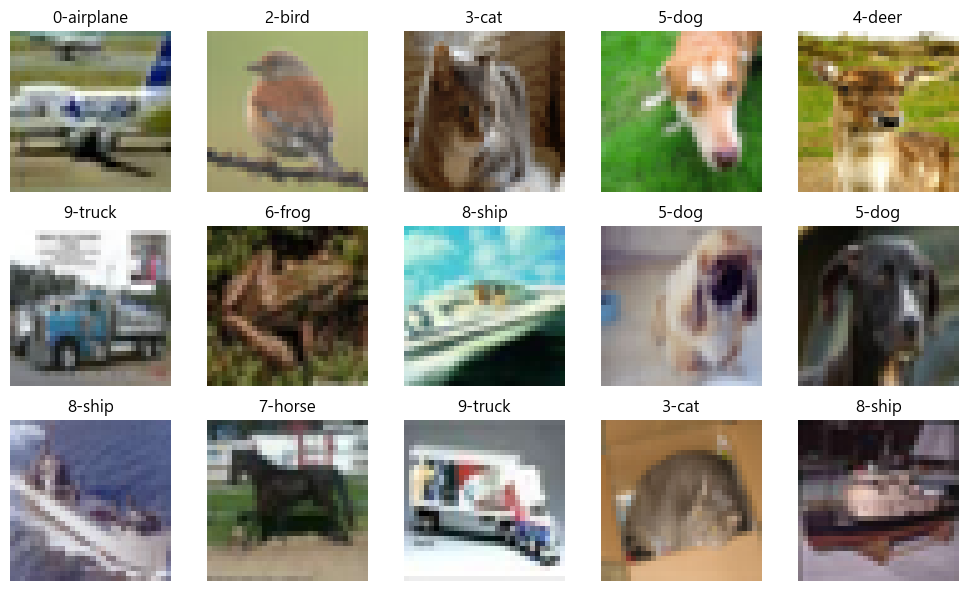

In [51]:
# matplotlib
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(15):
    idx = random.randint(0, len(trainset)) # 0 ~ 50000 사이의 정수를 랜덤하게 반환.
    img, label = trainset[idx] # (X, y)
    plt.subplot(3, 5, i+1)
    plt.imshow(img)  # PIL.Image, ndarray, torch.Tensor
    plt.title(f"{label}-{trainset.classes[label]}")
    plt.axis("off")
    
plt.tight_layout()
plt.show()

In [48]:
trainset.classes[5]

'dog'

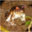

In [53]:
trainset[0][0]

6


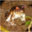

9


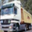

9


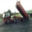

4


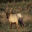

1


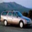

In [60]:
from IPython.display import display

for i in range(5):
    print(trainset[i][1])
    display(trainset[i][0])

### transform 매개변수를 이용한 데이터전처리

-   Dataset 생성할 때 전달하는 함수로 원본 영상 데이터를 모델에 주입(feeding)하기 전 **전처리 과정을 정의한다.**
    -   Data Pipeline을 구성하는 함수
-   매개변수로 input data 한개를 입력받아 처리한 결과를 반환하도록 구현한다.


### torchvision.transforms.ToTensor

-   PIL Image나 NumPy ndarray 를 FloatTensor(float32) 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
-   Image 의 shape을 (channel, height, width) 로 변경한다.
-   https://pytorch.org/vision/stable/transforms.html


In [67]:
tt = transforms.ToTensor()
print(type(trainset[0][0]))
return_data = tt(trainset[0][0])
return_data
return_data.shape, return_data.min(), return_data.max(), return_data.type()

<class 'PIL.Image.Image'>


(torch.Size([3, 32, 32]), tensor(0.), tensor(1.), 'torch.FloatTensor')

### transform.Normalize

-   채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나누어서 정규화를 진행한다.
-   ToTensor()로 변환된 데이터를 받아서 추가 변환
    -   여려 변환 순서대로 한번에 할 경우 `torchvision.transforms.Compose` 클래스를 이용해서 묶어준다.


In [69]:
nt = transforms.Normalize(mean=10, std=2)  # (X-mean)/std
ret_data2 = nt(return_data)
ret_data2

tensor([[[-4.8843, -4.9157, -4.9020,  ..., -4.6902, -4.7020, -4.7098],
         [-4.9686, -5.0000, -4.9647,  ..., -4.7588, -4.7667, -4.7608],
         [-4.9510, -4.9686, -4.9039,  ..., -4.7686, -4.7647, -4.7863],
         ...,
         [-4.5922, -4.6059, -4.6118,  ..., -4.6863, -4.8902, -4.8961],
         [-4.6471, -4.6608, -4.6353,  ..., -4.6392, -4.8098, -4.8373],
         [-4.6529, -4.6706, -4.6490,  ..., -4.5765, -4.7039, -4.7588]],

        [[-4.8784, -4.9098, -4.9059,  ..., -4.7412, -4.7549, -4.7569],
         [-4.9608, -5.0000, -4.9843,  ..., -4.8275, -4.8373, -4.8294],
         [-4.9529, -4.9863, -4.9471,  ..., -4.8353, -4.8353, -4.8569],
         ...,
         [-4.6667, -4.7000, -4.6843,  ..., -4.7392, -4.9392, -4.9333],
         [-4.7275, -4.7588, -4.7176,  ..., -4.7098, -4.8784, -4.8961],
         [-4.7176, -4.7471, -4.7216,  ..., -4.6392, -4.7686, -4.8196]],

        [[-4.8765, -4.9118, -4.9157,  ..., -4.7882, -4.8000, -4.7980],
         [-4.9608, -5.0000, -5.0000,  ..., -4

In [70]:
return_data.shape

torch.Size([3, 32, 32])

In [ ]:
# channel별로 지정한 mean과 std로 normalize 처리.
nt2 = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [73]:
# 여러개 transform 함수들을 사용할 경우 Compose()를 이용해 묶어준다.
# 지정한 순서대로 데이터를 처리한다.
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)
])

ds = datasets.MNIST(root="datasets", download=True, train=True, transform=transform)
d = ds[0][0]
d.min(), d.max()

(tensor(-1.), tensor(1.))

## DataLoader 생성

-   DataLoader
    -   모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    -   initalizer속성
        -   dataset: 값을 제공하는 Dataset 타입 객체
        -   batch_size: 한번에 값을 제공할 batch 크기
        -   shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        -   drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [88]:
from torch.utils.data import DataLoader

mnist_train_loader = DataLoader(mnist_trainset2, batch_size=1000, shuffle=True, drop_last=True)
# mnist_test_loader = DataLoader(mnist_testset, batch_size=1000)

In [89]:
# step 수
len(mnist_train_loader)

60

In [90]:
# DataLoader에서 Dataset을 조회
ds = mnist_train_loader.dataset
ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [92]:
# for i in mnist_train_loader:
#     print(i)

In [94]:
# mnist_train_loader[0]

In [97]:
# 한개 배치를 조회.
result = next(iter(mnist_train_loader))  # [X_batch, y_batch]
print(type(result), len(result))

<class 'list'> 2


In [98]:
X_train, y_train = next(iter(mnist_train_loader)) 

In [101]:
X_train.shape, y_train.shape

(torch.Size([1000, 1, 28, 28]), torch.Size([1000]))

# Custom Dataset 구현

1. `torch.utils.data.Dataset` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)`
    - DataSet객체 생성시 필요한 설정들을 초기화 한다.
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.


In [104]:
# subscriptable 타입 객체
class MySub:

    def __init__(self):
        # 제공할 데이터들을 초기화.
        self.zero = "호랑이"
        self.one = "사자"
        self.two = "개"
        self.three = "고양이"

    def __len__(self):
        # 제공할 데이터의 개수를 반환. -> len(객체) 이때 호출.
        return 4

    def __getitem__(self, idx):
        # idx 번째 데이터를 반환 -> 객체[idx] ==> 객체.__getitem__(idx)
        if idx == 0:
            return self.zero
        elif idx == 1:
            return self.one
        elif idx == 2:
            return self.two
        elif idx == 3:
            return self.three
        else:
            raise IndexError(f"{idx}는 없는 index입니다.")

In [105]:
ms = MySub()
print(len(ms))

4


In [109]:
ms[7]

IndexError: 7는 없는 index입니다.

In [112]:
l = [1, 2, 3]
len(l)
l[7]

IndexError: list index out of range

In [113]:
for i in ms:
    print(i)

호랑이
사자
개
고양이


## OxfordPet Dataset 생성

-   https://www.robots.ox.ac.uk/~vgg/data/pets/
-   개,고양이 37가지 품종
-   품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)
-   목표
    -   train: 70%, validation: 20%, test: 10%


In [114]:
import os
import re
from glob import glob
import tarfile # tar 압축파일 다루는 모듈.
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [115]:
tar_file_path = 'datasets/images.tar.gz'  #압축파일 경로
dataset_path = "datasets/oxfordpet" # 압축을 풀 경로
pet_dataset_path = "datasets/oxfordpet/images" # 압축 풀린 이미지가 저장될 경로.

In [116]:
# 압축풀기
with tarfile.open(tar_file_path) as tar: # 압축파일과 연결(open)
    tar.extractall(dataset_path)  # 압축풀 경로를 넣어서 풀기. 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4752\3243547746.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(dataset_path)  # 압축풀 경로를 넣어서 풀기.


In [118]:
# 이미지 파일들의 경로 조회
file_list = glob(pet_dataset_path+"/*.jpg")
file_list[:5], len(file_list)

(['datasets/oxfordpet/images\\Abyssinian_1.jpg',
  'datasets/oxfordpet/images\\Abyssinian_10.jpg',
  'datasets/oxfordpet/images\\Abyssinian_100.jpg',
  'datasets/oxfordpet/images\\Abyssinian_101.jpg',
  'datasets/oxfordpet/images\\Abyssinian_102.jpg'],
 7390)

In [122]:
# 파일명구성: className_번호.jpg
#             대문자로시작: 고양이, 소문자로시작: 개
## 파일경로에서 label(class)를 추출
f = file_list[0]
print("파일경로에서 디렉토리경로만 조회: ", os.path.dirname(f))
print("파일경로에서 파일명만 조회: ", os.path.basename(f))
print("파일명에서 파일명과 확장자를 분리 ", os.path.splitext(f)) # 확장자와 나머지를 분리.

파일경로에서 디렉토리경로만 조회:  datasets/oxfordpet/images
파일경로에서 파일명만 조회:  Abyssinian_1.jpg
파일명에서 파일명과 확장자를 분리  ('datasets/oxfordpet/images\\Abyssinian_1', '.jpg')


In [123]:
os.path.splitext("abcde.txt")

('abcde', '.txt')

In [126]:
img = Image.open(r"datasets/oxfordpet/images\Abyssinian_1.jpg")
img.close()

In [127]:
## jpg color(RGB) 이미지만 남기고 삭제
remove_cnt = 0 # 몇장 지웠는지 확인용.
for file in file_list:
    # 이미지 연결(open)
    with Image.open(file) as img:
        img_mode = img.mode  # "RGB": rgb color, 'L': gray scale
    if img_mode != "RGB":
        #RGB 아닌 파일은 삭제
        os.remove(file)
        remove_cnt += 1
        print(f"삭제한 파일명: {os.path.basename(file)}")

삭제한 파일명: Abyssinian_34.jpg
삭제한 파일명: Abyssinian_5.jpg
삭제한 파일명: Egyptian_Mau_129.jpg
삭제한 파일명: Egyptian_Mau_139.jpg
삭제한 파일명: Egyptian_Mau_14.jpg
삭제한 파일명: Egyptian_Mau_145.jpg
삭제한 파일명: Egyptian_Mau_167.jpg
삭제한 파일명: Egyptian_Mau_177.jpg
삭제한 파일명: Egyptian_Mau_186.jpg
삭제한 파일명: Egyptian_Mau_191.jpg
삭제한 파일명: staffordshire_bull_terrier_2.jpg
삭제한 파일명: staffordshire_bull_terrier_22.jpg


In [128]:
remove_cnt

12

In [130]:
# 이미지 파일 경로 목록을 갱신
file_list = glob(pet_dataset_path+"/*.jpg")
len(file_list)

7378

In [132]:
# mnist_trainset.classes    # index_to_class
# mnist_trainset.class_to_idx # class_to_index

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

### index_to_class, class_to_index 생성

-   **index**: class index 번호(0, 1, 2), **class**: class 이름 (dog, cat, ..)
-   **index_to_class**: class들을 가지는 리스트. index(0, 1, ..)로 class 조회
    -   index를 주면 class 이름을 반환
-   **class_to_index**: key: 클래스이름, value: index -> class이름 넣으면 index 반환
    -   class 이름을 주면 index를 반환
-   Oxford PET - 파일명이 class
    -   대문자로 시작: 고양이, 소문자로 시작: 개
    -   파일명: 품종\_번호.jpg


In [ ]:
# class <-> index
### 수기로 직접 작성.
# index_to_class = ["개", "고양이"]

In [143]:
file_list[400]

'datasets/oxfordpet/images\\american_pit_bull_terrier_100.jpg'

In [145]:
file_name.split("_")

['american', 'pit', 'bull', 'terrier', '100.jpg']

In [150]:
### 파일명을 이용해서 작성
f = file_list[400]
file_name = os.path.basename(f)
# label = file_name.split("_")[0]
label = re.sub(r"_\d+.jpg", "", file_name)
# 개-고양이
label2 = "고양이" if file_name[0].isupper() else "개"
print(label, label2)

american_pit_bull_terrier 개


In [149]:
import re

f = file_list[400]
file_name = os.path.basename(f)
print(file_name)
# _번호.jpg 패턴을 file_name(문자열) 에서 제거.
re.sub(r"_\d+.jpg", "", file_name)  # \d: 숫자1개  + (앞의 패턴이 1개 이상나온다.)
# ("패턴", "변경할문자열", 대상)

american_pit_bull_terrier_100.jpg


'american_pit_bull_terrier'

In [152]:
class_name_set = set() # 중복제거를 위해 빈 set을 생성.
for f in file_list:
    file_name = os.path.basename(f)
    label = re.sub(r"_\d+.jpg", "", file_name)
    class_name_set.add(label)

In [156]:
index_to_class = list(class_name_set)
index_to_class.sort() # 오름차순 정렬
index_to_class

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [159]:
class_to_index = {value : index for index, value in enumerate(index_to_class)}    # dict {className : index}

In [161]:
class_to_index["Bengal"]

1

In [165]:
# train(70%)/test(10%)/valid(20%) set을 분리 => class 별로 분리
## 200 개 기준
train_idx = int(200 * 0.7)
valid_idx = train_idx + int(200 * 0.2)
train_idx, valid_idx
# 0 ~ train_idx         : train set
# train_idx ~ valid_idx : valid set
# valid_idx ~           : test set

(140, 180)

In [167]:
train_file_list = []
valid_file_list = []
test_file_list = []

cnt = 0 # class별 몇번째 파일인지를 저장할 변수.
previous_class = None # 이전 반복에서 처리한 파일의 class 이름.
file_list.sort()

for path in file_list:
    file_name = os.path.splitext(os.path.basename(path))[0]  # Bangal_30
    class_name = re.sub(r"_\d+", "", file_name) # 품종 class 추출: Bangal

    if previous_class == class_name: # 이전처리 class와 현재처리 class가 같으면
        cnt += 1 # 동일한 클래스 처리: 처리 count를 1 증가
    else:
        cnt = 0  # 다른 클래스를 처리: 처리 count를 0으로 초기화

    if cnt <= train_idx: # train_file_list에 추가.   0 ~ 140-1
        train_file_list.append(path)
    elif cnt > train_idx and cnt <= valid_idx:  # 140 ~ 180-1
        valid_file_list.append(path)
    else: # 180-1 ~ 
        test_file_list.append(path)
        
    previous_class = class_name

In [168]:
print(train_file_list[0])
print(valid_file_list[0])
print(test_file_list[0])

datasets/oxfordpet/images\Abyssinian_1.jpg
datasets/oxfordpet/images\Abyssinian_44.jpg
datasets/oxfordpet/images\Abyssinian_84.jpg


In [170]:
len(train_file_list), len(valid_file_list), len(test_file_list)

(5217, 1480, 681)

In [ ]:
# 시작전에 위의 코드들을 실행. 

## torchvision.datasets.ImageFolder 이용

-   영구저장장치(HDD)에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
-   train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.

![img](figures/06_image_folder_dir.png)


In [ ]:
# gdown: google drive 의 파일을 다운로드 하는 라이브러리.
!pip install gdown --upgrade

In [ ]:
import os
from zipfile import ZipFile
import gdown


def down_extract():
    os.makedirs("data", exist_ok=True)
    url = "https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV"
    fname = "data/cats_and_dogs_small.zip"

    gdown.download(url, fname, quiet=False)

    # zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile

    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile:
        zipFile.extractall(os.path.join("data", "cats_and_dogs_small"))


down_extract()

## 메모리상의 Tensor, ndarray 타입의 데이터를 이용해 Dataset생성

-   torch.utils.data.TensorDataset 이용
-   parameter
    -   input: Tensor
    -   output: Tensor


# 모델 성능 평가를 위한 데이터셋 분리

-   **Train 데이터셋 (훈련/학습 데이터셋)**
    -   모델을 학습시킬 때 사용할 데이터셋.
-   **Validation 데이터셋 (검증 데이터셋)**
    -   모델의 성능 중간 검증을 위한 데이터셋
-   **Test 데이터셋 (평가 데이터셋)**
    -   모델의 성능을 최종적으로 측정하기 위한 데이터셋
    -   **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**

## 검증(validation), 평가(test) 데이터셋을 나누는 이유

-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> -   **(Parameter)머신러닝 모델 파라미터**
>     -   성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>         -   **하이퍼파라미터(Hyper Parameter)**
>             -   사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>             -   딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>         -   **파라미터(Parameter)**
>             -   모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>             -   딥러닝 모델에서는 weight와 bias 가 파라미터다.


## Dataset 분리

### torch.utils.data.Subset을 이용

-   Dataset의 일부를 가지는 부분집합 데이터셋을 생성
-   주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)


### random_split() 함수 이용

-   Dataset객체와 나눌 데이터셋들의 원소개수를 리스트로 묶어서 전달하면 Shuffle후 나눈뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.
